In [1]:
import os
from pathlib import Path
import random

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.applications import InceptionV3
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

In [50]:
resnet_model = ResNet50(weights='imagenet')

In [35]:
vgg_model = VGG16(weights="imagenet")

In [44]:
image_list = os.listdir('thumbnails')
random_image = random.choice(image_list)
image_path = Path.cwd() / 'thumbnails' / random_image
print(image_path)

/Users/triznam/Dropbox (Smithsonian)/nmah_dupes/thumbnails/NMAH-AHB2017q050616.jpg


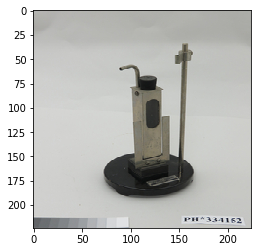

In [45]:
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(img)

In [46]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [47]:
preds = resnet_model.predict(x)

prediction_labels = decode_predictions(preds, top=3)[0]
for ilabel, label_name, confidence in prediction_labels:
    print(label_name, confidence)

soap_dispenser 0.21036997
paper_towel 0.067318805
microphone 0.05539987


In [48]:
preds = vgg_model.predict(x)

prediction_labels = decode_predictions(preds, top=3)[0]
for ilabel, label_name, confidence in prediction_labels:
    print(label_name, confidence)

pencil_sharpener 0.074543536
espresso_maker 0.07022556
space_heater 0.04673991
